In [1]:
from animal_soup import *

2023-05-30 13:50:15.618434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 13:50:16.060582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/clewis7/repos/animal-soup/animal_soup/batch_utils.py:137: UserWarning: registration of accessor <class 'animal_soup.batch_utils.PathsDataFrameExtension'> under name 'paths' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("paths")
/home/clewis7/repos/animal-soup/animal_soup/batch_utils.py:142: UserWarning: registration of accessor <class 'animal_soup.batch_utils.PathsSeriesExtension'> under name 'paths' for type <class 'pandas.core.series.Series'> i

In [2]:
training_data_path = set_parent_raw_data_path('/data/caitlin/training-vids/')
df_path = get_parent_raw_data_path().joinpath('data-frames/deepetho_results.hdf')

In [3]:
df = load_df(df_path)

In [4]:
df

,animal_id,session_id,mat_path,session_vids,notes
0,M235Slc17a7_Gtacr2,20170424,M235Slc17a7_Gtacr2/20170424/jaaba.mat,[M235Slc17a7_Gtacr2/20170424/M235_20170424_v00...,None
1,M235Slc17a7_Gtacr2,20170425,M235Slc17a7_Gtacr2/20170425/jaaba.mat,[M235Slc17a7_Gtacr2/20170425/M235_20170425_v00...,None
2,M236Slc17a7_Gtacr2,20170501,M236Slc17a7_Gtacr2/20170501/jaaba.mat,[M236Slc17a7_Gtacr2/20170501/M236_20170501_v00...,None


In [5]:
container = df.behavior.comparison_view()

/home/clewis7/venvs/mescore/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:87: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:92: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


RFBOutputContext()

RFBOutputContext()

In [6]:
container.show()

In [7]:
from pathlib import Path

In [8]:
deg_data_path = Path('/data/caitlin/deg-jaaba/DATA')

In [10]:
import pandas as pd
import numpy as np
import os

In [24]:
def save_deg_prediction(deg_data_path, animal_id, session_id):
    all_preds = list()
    preds_not_saved = list()
    row = df.loc[(df['animal_id'] == animal_id) & (df['session_id'] == session_id) ]
    options = [item.stem for item in row['session_vids'].item()]
    for op in options:
        # get the labels file
        try:
            deg_prediction = pd.read_csv(filepath_or_buffer=deg_data_path.joinpath(op, op).with_name(f'{op}_predictions').with_suffix('.csv'))
            deg_prediction = deg_prediction.drop('background', axis=1)
            deg_prediction = deg_prediction.drop('Unnamed: 0', axis=1)
            behaviors = deg_prediction.columns
            deg_prediction = deg_prediction.to_numpy(dtype='uint8').T
            all_preds.append(deg_prediction)
        except FileNotFoundError:
            raise ValueError(f"prediction file not saved @ {op}")
    all_preds = np.asarray(all_preds)
    np.save(training_data_path.joinpath(animal_id).joinpath(session_id).joinpath(session_id).with_name(f'deg_labels').with_suffix('.npy'), all_preds)
    return all_preds

In [26]:
preds = save_deg_prediction(deg_data_path=deg_data_path, animal_id='M236Slc17a7_Gtacr2', session_id='20170501')

In [27]:
preds.shape

(80, 6, 1998)

In [8]:
animal_id='M236Slc17a7_Gtacr2'
session_id='20170501'

In [9]:
training_data_path.joinpath(animal_id).joinpath(session_id).joinpath(session_id).with_name(f'deg_labels').with_suffix('.npy')

PosixPath('/data/caitlin/training-vids/M236Slc17a7_Gtacr2/20170501/deg_labels.npy')

In [11]:
np.load(training_data_path.joinpath(animal_id).joinpath(session_id).joinpath(session_id).with_name(f'deg_labels').with_suffix('.npy'))

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ...,

In [11]:
from cv2 import EMD, DIST_L2

In [12]:
def emd_1d(u: np.ndarray, v: np.ndarray) -> float:
    """
    Wrapper around OpenCV Earth Mover's Distance (EMD) function to calculate EMD between 1D arrays
    :param u: an array of weights
    :param v: an array of weights
    :return: Earth Mover's Distance between u & v
    """

    a = np.empty((u.size, 2), dtype=np.float32)
    b = np.empty((v.size, 2), dtype=np.float32)

    a[:, 0] = u.astype(np.float32)
    a[:, 1] = np.arange(u.size, dtype=np.float32)

    b[:, 0] = v.astype(np.float32)
    b[:, 1] = np.arange(v.size, dtype=np.float32)

    return EMD(a, b, DIST_L2)[0]

In [13]:
import numpy as np
from tqdm import tqdm

In [14]:
emds = list()
row = df.loc[(df['animal_id'] == 'M236Slc17a7_Gtacr2') & (df['session_id'] == '20170501') ]
options = [item.stem for item in row['session_vids'].item()]
session_dir = training_data_path.joinpath(row['animal_id'].item()).joinpath(row['session_id'].item())
for op in tqdm(options):
    trial_index = int(op.split('_v')[-1]) - 1
    jab_ethogram_array, behaviors = container._get_ethogram(trial_index, list(session_dir.glob("*.mat"))[0])
    deg_ethogram_array = np.load(session_dir.joinpath(op).with_suffix('.npy'))
    emd = list()
    for jab, deg in zip(jab_ethogram_array, deg_ethogram_array):
        try:
            emd.append(emd_1d(jab, deg))
        except:
            emd.append(0)
    emds.append(emd)

100%|███████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.82it/s]


In [47]:
emds2 = list()
row = df.loc[(df['animal_id'] == 'M235Slc17a7_Gtacr2') & (df['session_id'] == '20170424') ]
options = [item.stem for item in row['session_vids'].item()]
session_dir = training_data_path.joinpath(row['animal_id'].item()).joinpath(row['session_id'].item())
for op in tqdm(options):
    trial_index = int(op.split('_v')[-1]) - 1
    jab_ethogram_array, behaviors = container._get_ethogram(trial_index, list(session_dir.glob("*.mat"))[0])
    deg_ethogram_array = np.load(session_dir.joinpath(op).with_suffix('.npy'))
    emd = list()
    for jab, deg in zip(jab_ethogram_array, deg_ethogram_array):
        try:
            emd.append(emd_1d(jab, deg))
        except:
            emd.append(0)
    emds2.append(emd)

100%|███████████████████████████████████████████████████████████████████████████████| 80/80 [00:15<00:00,  5.30it/s]


In [48]:
len(emds)

80

In [15]:
lift = list()
handopen = list()
grab = list()
sup = list()
atmouth = list()
chew = list()
for e in emds: 
    lift.append(e[0])
    handopen.append(e[1])
    grab.append(e[2])
    sup.append(e[3])
    atmouth.append(e[4])
    chew.append(e[5])

In [16]:
import matplotlib.pyplot as plt

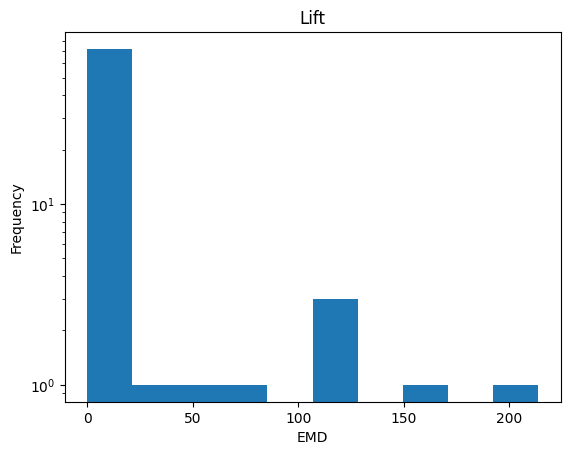

In [22]:
plt.hist(np.asarray(lift))
plt.xlabel('EMD')
plt.ylabel('Frequency')
plt.title('Lift')
plt.yscale("log")

In [ ]:
lift = list()
handopen = list()
grab = list()
sup = list()
atmouth = list()
chew = list()
for e in emds2: 
    lift.append(e[0])
    handopen.append(e[1])
    grab.append(e[2])
    sup.append(e[3])
    atmouth.append(e[4])
    chew.append(e[5])

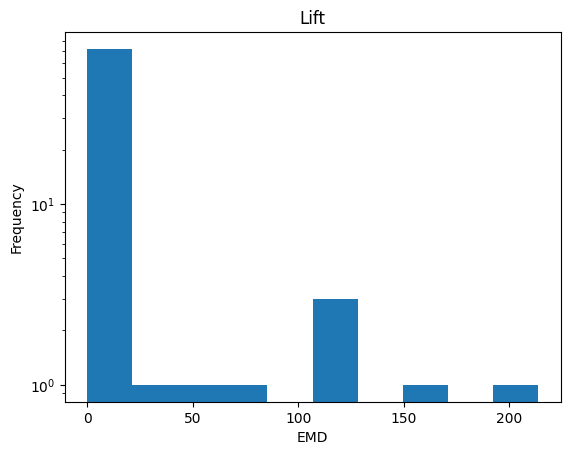

In [57]:
plt.hist(np.asarray(lift))
plt.xlabel('EMD')
plt.ylabel('Frequency')
plt.title('Lift')
plt.yscale("log")